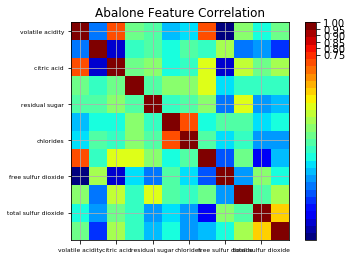

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm

df= pd.read_csv('/home/nishchay/Documents/Arcon/Day7/winequality-red.csv')
X1=df.iloc[:,3].values

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
ax1.grid(True)
plt.title('Abalone Feature Correlation')
labels=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol', 'quality']
ax1.set_xticklabels(labels,fontsize=6)
ax1.set_yticklabels(labels,fontsize=6)
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()
plt.savefig('Correlation_of_wine_quality')

In [6]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [11]:
import numpy as np
import pandas as pd
from pandas_ml import ConfusionMatrix
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pickle as pickle

df=pd.read_csv('/home/nishchay/Documents/Arcon/Day6/winequality-red.csv')
df=pd.get_dummies(df,columns=['quality'])
df.drop(['citric acid','residual sugar','pH','free sulfur dioxide','quality_3','quality_8'], axis = 1, inplace = True)
training_data=df.head(1100).iloc[:,0:7].values
testing_data=df.tail(400).iloc[:,0:7].values
X=df.iloc[:,0:7].values
y=df.iloc[:,7:11].values
X = X/np.amax(X, axis=0)
training_data = training_data/np.amax(training_data, axis=0)
testing_data = testing_data/np.amax(testing_data, axis=0)
#xPredicted = xPredicted/np.amax(xPredicted, axis=0)
#y = y/100

class Neural_Network(object):
  def __init__(self):

    self.inputSize = 7
    self.outputSize = 4
    self.hiddenSize = 10

    self.W1 = np.random.randn(self.inputSize, self.hiddenSize)
    self.W2 = np.random.randn(self.hiddenSize, self.outputSize) 

  def predict(self,actual):
    print ('Predicting ...')
    predicted=[]
    for i in range(0,testing_data.shape[0]):
        l1 = 1/(1 + np.exp(-(np.dot(testing_data[i], NN.W1))))
        l2 = 1/(1 + np.exp(-(np.dot(l1, NN.W2))))
        predicted.append(np.round(l2,3))
    plt.hist(predicted, normed=True, bins=30)
    plt.ylabel('Probability')
    plt.show()
    #accuracy=predicted/actual
    #accuracy[accuracy >1]=0
    #print ('Accuracy: '+str(np.mean(accuracy)*3))

NN = Neural_Network()
def run(NN):
	learning_rate = 0.2 # slowly update the network
	error=[]
	for epoch in range(5000):
		for i in range(0,training_data.shape[0]):
		    row=X[i][np.newaxis]
		    l1 = 1/(1 + np.exp(-(np.dot(row, NN.W1))))# sigmoid function
		    l2 = 1/(1 + np.exp(-(np.dot(l1, NN.W2))))
		    er = (abs(y[i] - l2)).mean()
		    l2_delta = (y[i][np.newaxis] - l2)*(l2 * (1-l2))
		    l1_delta = l2_delta.dot(NN.W2.T) * (l1 * (1-l1))
		    NN.W2 += l1.T.dot(l2_delta) * learning_rate
		    NN.W1 += row.T.dot(l1_delta) * learning_rate
		print ('Error:', er)
		error.append(er)
	plt.hist(error, normed=True, bins=30)
	plt.ylabel('Probability');
	list_pickle_path1 = 'list_pickle_weight1.pkl'
	list_pickle_path2 = 'list_pickle_weight2.pkl'
	list_pickle1 = open(list_pickle_path1, 'wb')
	list_pickle2 = open(list_pickle_path2, 'wb')
	pickle.dump(NN.W1, list_pickle1)
	pickle.dump(NN.W2, list_pickle2)
	list_pickle1.close()
	list_pickle2.close()
#NN.predict(y)
#run (NN)

with open('list_pickle_weight1.pkl','rb') as f: 
	NN.W1 = pickle.load(f)

with open('list_pickle_weight2.pkl','rb') as f: 
	NN.W2 = pickle.load(f)
NN.predict(y)

Error: 0.3774703551986601
Error: 0.37158146488402016
Error: 0.36664207158216156
Error: 0.36214413131384193
Error: 0.3578641957664096
Error: 0.35244648138451795
Error: 0.3458612637995514
Error: 0.3387771819040449
Error: 0.3317477304523905
Error: 0.3251008033036566
Error: 0.3189982468502397
Error: 0.31349879731442565
Error: 0.3086014192887906
Error: 0.3042724333549288
Error: 0.300462083794298
Error: 0.29711458084019865
Error: 0.29417407748821867
Error: 0.29158804799186255
Error: 0.28930898188122967
Error: 0.2872949999766281
Error: 0.28550981228156935
Error: 0.2839223093993973
Error: 0.28250598352829603
Error: 0.28123830300533226
Error: 0.28010011198022977
Error: 0.27907509098711414
Error: 0.2781492914650996
Error: 0.2773107441173787
Error: 0.2765491342905117
Error: 0.2758555348932055
Error: 0.27522218705419293
Error: 0.2746423196162393
Error: 0.2741099999689743
Error: 0.2736200102101501
Error: 0.2731677439548127
Error: 0.2727491201766271
Error: 0.2723605112471519
Error: 0.271998682876604

Error: 0.21769134124466527
Error: 0.2175387356848132
Error: 0.21738695852912926
Error: 0.21723597401289071
Error: 0.2170857470649448
Error: 0.2169362433382789
Error: 0.21678742923720765
Error: 0.21663927194136928
Error: 0.2164917394267306
Error: 0.21634480048375107
Error: 0.21619842473289852
Error: 0.21605258263764962
Error: 0.21590724551513402
Error: 0.2157623855445601
Error: 0.2156179757735497
Error: 0.2154739901225186
Error: 0.21533040338721576
Error: 0.21518719123953634
Error: 0.215044330226721
Error: 0.21490179776904816
Error: 0.2147595721561122
Error: 0.2146176325417933
Error: 0.2144759589380068
Error: 0.21433453220731122
Error: 0.21419333405447913
Error: 0.21405234701708703
Error: 0.213911554455222
Error: 0.21377094054036488
Error: 0.21363049024352274
Error: 0.213490189322678
Error: 0.2133500243096212
Error: 0.21320998249621753
Error: 0.2130700519201695
Error: 0.2129302213503315
Error: 0.21279048027162037
Error: 0.21265081886957224
Error: 0.21251122801459255
Error: 0.21237169924

Error: 0.18269991982740857
Error: 0.18263398765777655
Error: 0.18256832929005473
Error: 0.18250294334729572
Error: 0.1824378284505666
Error: 0.1823729832191315
Error: 0.1823084062706396
Error: 0.18224409622130366
Error: 0.18218005168608983
Error: 0.18211627127889965
Error: 0.18205275361274448
Error: 0.18198949729993416
Error: 0.1819265009522554
Error: 0.18186376318114997
Error: 0.18180128259789793
Error: 0.1817390578137934
Error: 0.18167708744032446
Error: 0.18161537008935727
Error: 0.18155390437330615
Error: 0.18149268890532086
Error: 0.18143172229946236
Error: 0.18137100317088312
Error: 0.1813105301360061
Error: 0.1812503018127109
Error: 0.18119031682050657
Error: 0.1811305737807236
Error: 0.18107107131669262
Error: 0.1810118080539263
Error: 0.18095278262031161
Error: 0.18089399364629413
Error: 0.180835439765065
Error: 0.180777119612758
Error: 0.18071903182863042
Error: 0.18066117505527457
Error: 0.18060354793879796
Error: 0.18054614912903452
Error: 0.18048897727974028
Error: 0.18043

Error: 0.1719583374762564
Error: 0.17195132280409112
Error: 0.17194439166813932
Error: 0.17193754202135583
Error: 0.17193077182475391
Error: 0.171924079047807
Error: 0.1719174616688443
Error: 0.17191091767545
Error: 0.17190444506483943
Error: 0.17189804184424343
Error: 0.1718917060312854
Error: 0.17188543565434575
Error: 0.17187922875292902
Error: 0.17187308337801321
Error: 0.1718669975924082
Error: 0.17186096947109816
Error: 0.17185499710157875
Error: 0.17184907858418694
Error: 0.1718432120324348
Error: 0.1718373955733218
Error: 0.17183162734765106
Error: 0.1718259055103353
Error: 0.17182022823069884
Error: 0.17181459369276814
Error: 0.1718090000955587
Error: 0.1718034456533597
Error: 0.17179792859599946
Error: 0.17179244716911804
Error: 0.17178699963442368
Error: 0.1717815842699447
Error: 0.17177619937027425
Error: 0.17177084324680789
Error: 0.17176551422797676
Error: 0.17176021065946812
Error: 0.17175493090443836
Error: 0.17174967334373098
Error: 0.17174443637606565
Error: 0.1717392

Error: 0.16935371006968652
Error: 0.16934274191935783
Error: 0.1693317817018973
Error: 0.16932082958415817
Error: 0.1693098857308751
Error: 0.1692989503046874
Error: 0.16928802346616836
Error: 0.16927710537383994
Error: 0.16926619618420377
Error: 0.16925529605176018
Error: 0.1692444051290316
Error: 0.1692335235665925
Error: 0.16922265151308763
Error: 0.16921178911525617
Error: 0.16920093651796164
Error: 0.16919009386421244
Error: 0.16917926129518648
Error: 0.1691684389502597
Error: 0.16915762696702671
Error: 0.1691468254813288
Error: 0.16913603462727952
Error: 0.16912525453728544
Error: 0.16911448534207746
Error: 0.16910372717073238
Error: 0.16909298015070182
Error: 0.16908224440783207
Error: 0.1690715200663938
Error: 0.16906080724910846
Error: 0.1690501060771682
Error: 0.16903941667026925
Error: 0.1690287391466293
Error: 0.16901807362302085
Error: 0.16900742021478846
Error: 0.16899677903588
Error: 0.1689861501988694
Error: 0.16897553381498326
Error: 0.1689649299941252
Error: 0.1689543

Error: 0.1667831035895338
Error: 0.16677816743604534
Error: 0.166773250440764
Error: 0.16676835244213145
Error: 0.16676347327562813
Error: 0.1667586127737423
Error: 0.16675377076594455
Error: 0.1667489470786599
Error: 0.16674414153523356
Error: 0.16673935395591244
Error: 0.16673458415780212
Error: 0.16672983195485214
Error: 0.16672509715781772
Error: 0.16672037957423033
Error: 0.16671567900837408
Error: 0.16671099526125202
Error: 0.16670632813055444
Error: 0.16670167741063124
Error: 0.1666970428924627
Error: 0.16669242436362836
Error: 0.16668782160827397
Error: 0.16668323440708602
Error: 0.16667866253725866
Error: 0.16667410577245997
Error: 0.16666956388281007
Error: 0.16666503663484122
Error: 0.16666052379147217
Error: 0.166656025111976
Error: 0.1666515403519517
Error: 0.16664706926329212
Error: 0.16664261159415353
Error: 0.16663816708892398
Error: 0.166633735488194
Error: 0.1666293165287317
Error: 0.16662490994344223
Error: 0.1666205154613463
Error: 0.1666161328075488
Error: 0.166611

Error: 0.16440052298842894
Error: 0.16438598477494834
Error: 0.1643714285288075
Error: 0.16435685495681365
Error: 0.1643422647614354
Error: 0.16432765864059826
Error: 0.16431303728750105
Error: 0.16429840139041774
Error: 0.16428375163252631
Error: 0.16426908869172074
Error: 0.1642544132404458
Error: 0.16423972594552297
Error: 0.1642250274679962


KeyboardInterrupt: 